<a href="https://colab.research.google.com/github/moiraone/hub_zone_dod/blob/main/Script_DCADS_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Scraping contract data from the Federal Procurement Data System (FPDS) database**

The following script parses and extracts over 51 million data records of Department of Defense investment since ~1965.

Start by installing BeautifulSoup (the web scraper) and other libraries I'll need.

In [17]:
%%capture
!pip install beautifulsoup4

In [34]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup as bs
from operator import itemgetter
from itertools import filterfalse

I've already filtered the FPDS system by Department, in this case the Department of Defense.  So the URL links all the DOD contracts of interest.

In [19]:
url = 'https://www.fpds.gov/ezsearch/fpdsportal?s=FPDS.GOV&templateName=1.5.2&indexName=awardfull&q=DEPARTMENT_FULL_NAME%3A%22DEPT+OF+DEFENSE%22'
req = requests.get(url) #store results in req, has text attribute from source html
soup = bs(req.text, 'html.parser') #start parsing html
#bs is reading html and understanding its basic structure

Here's what the html code looks like:

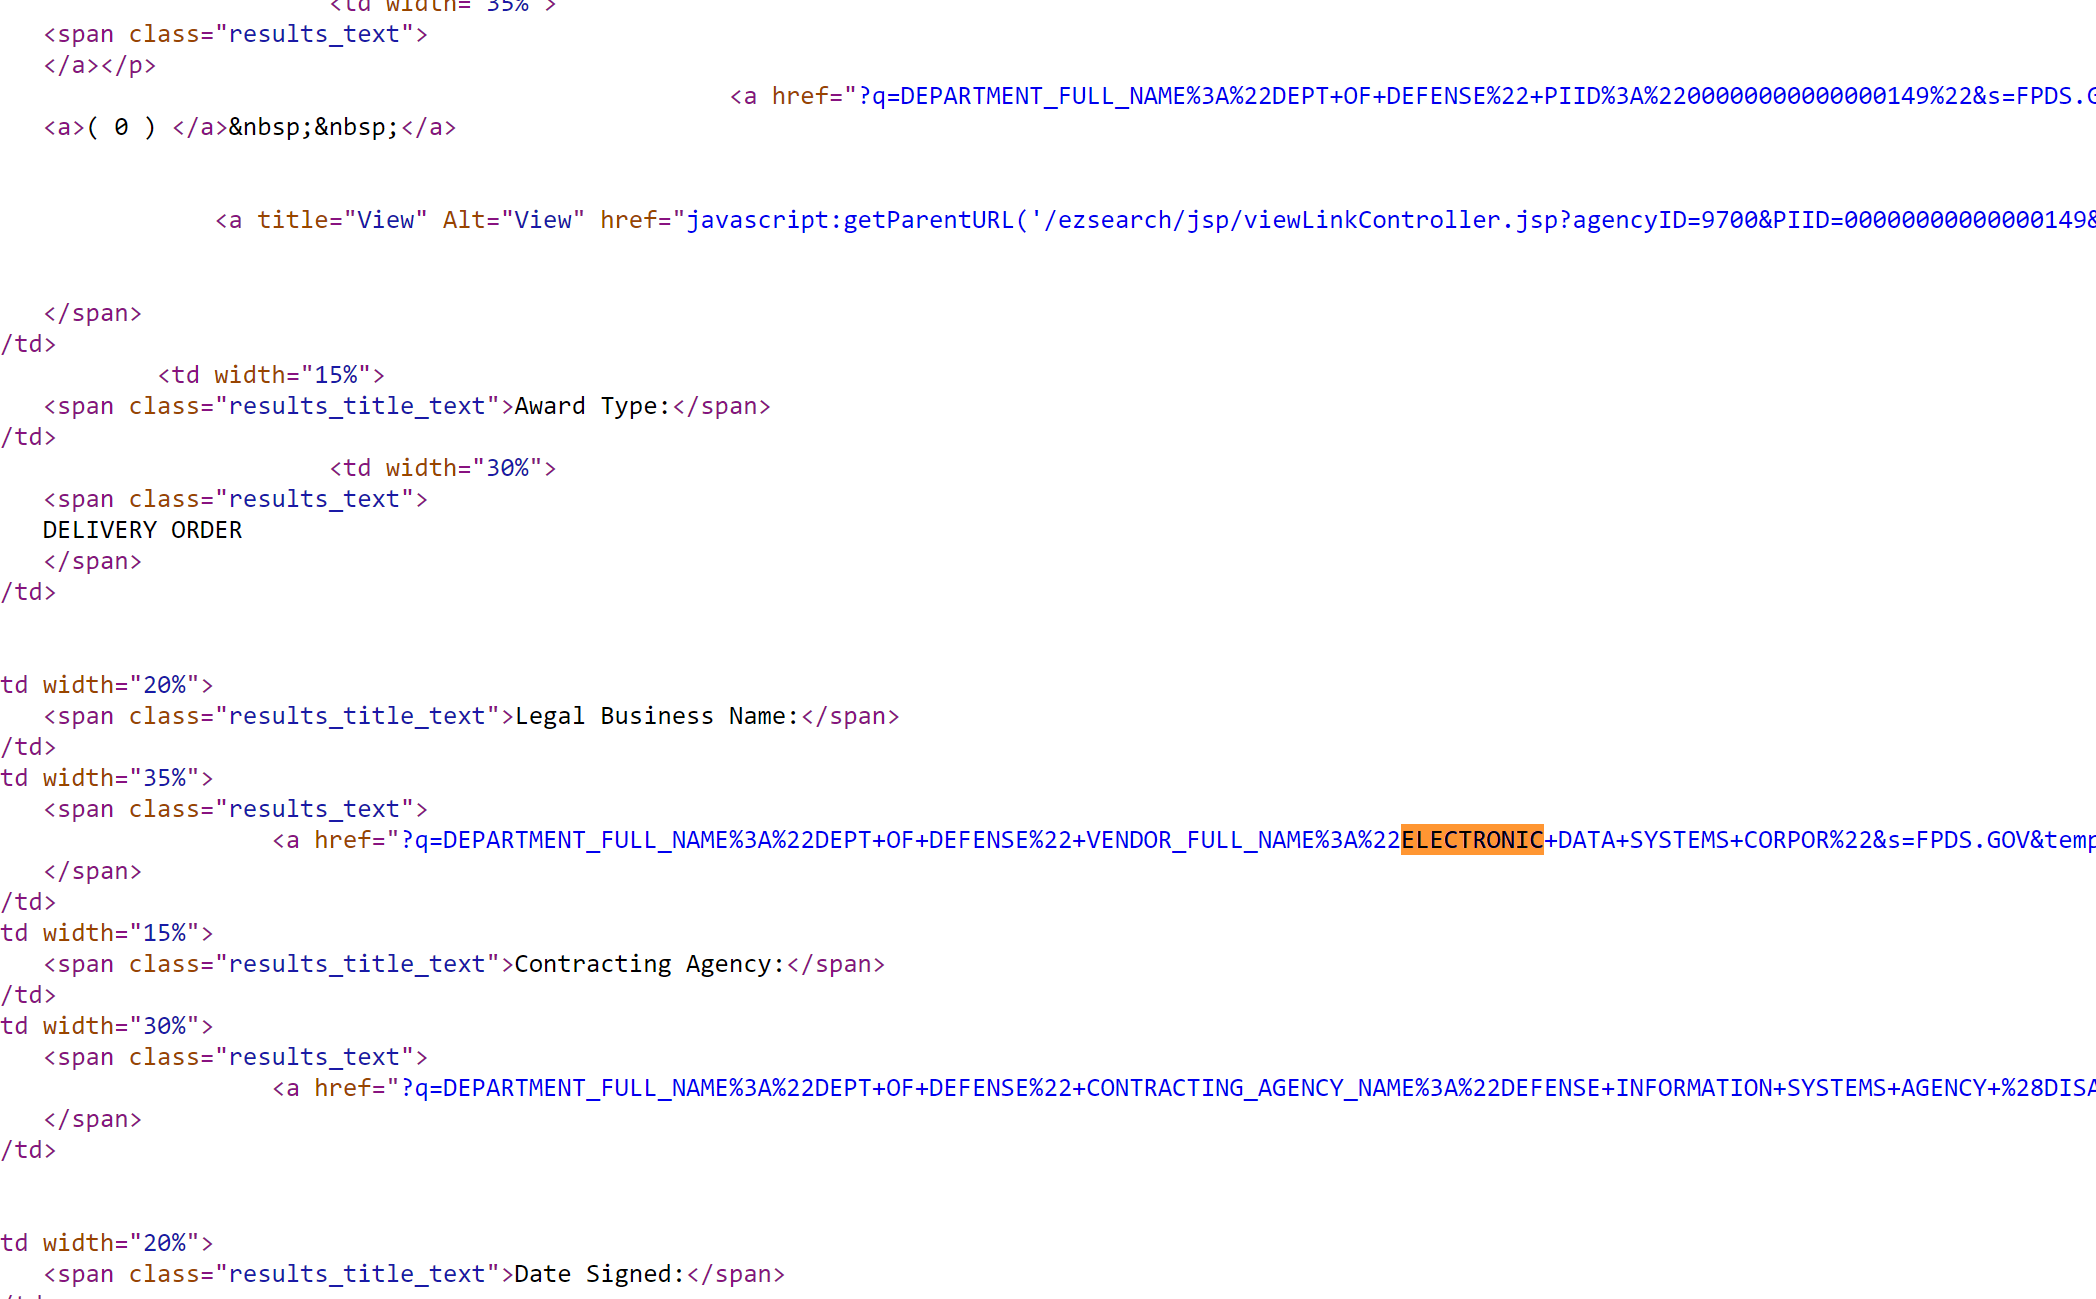![image.png]()

All of the data labels start with `<span class = "results_title_text">LABEL:</span>`

And all of the observations start with `<span class="results_text">DATA:</span>`

We should be able to exploit this consistency to scrape the webpage.

In [52]:
labels = soup.find_all('span', attrs={'class':'results_title_text'})
obs = soup.find_all('span', attrs={'class':'results_text'})

Check to see the output so far.

In [21]:
first_label = labels[0]
first_label

<span class="results_title_text">Award ID (Mod#):</span>

In [22]:
first_obs = obs[0]
first_obs

<span class="results_text">
</span>

The next step is to play around with locating and extracting the exact data of interest.   Labels to locate:  Legal Business Name, Date Signed, NAICS (Code), Entity City, Entity State, Entity ZIP, Ultimate Parent Legal Business Name, Award Type, Contracting Agency, Action Obligation, PSC (Code).  These will become the column names.

In [56]:
label_names = []
for label in labels:
  names = label.text #outputs label as a string
  label_names.append(names)

Then I need to locate the observations for each data record for each label. These will become the row values.

In [43]:
obs_list = []
for ob in obs:
  obs_values = ob.text
  obs_values = obs_values.replace("\t", "").replace("\n", "")
  obs_list.append(obs_values)

Because the lengths of the lists differ, I need to delete the last 2 rows in label names to bring the label list in line with the observations list.  Then I combine the corresponding lists into a dataframe.

In [ ]:
label_names.pop() 
label_names.pop()
#len(label_names)
#len(obs_list)
#both have 540 items

In [60]:
d = {'Label': label_names, 'Observation': obs_list}
records = pd.DataFrame(d, columns = ['Label', 'Observation'])
records.shape

(540, 2)

So far so good!  For now, I am comfortable leaving the data frame in the two-column format, and plan to rearrange later into a simpler table.

Now that the scraping is tested, the next step is to use a for-loop to iterate through all the pages in the DOD contract search results (~ 1.8 million pages) to collect the same data.

In [ ]:

# URL = 'https://www.geeksforgeeks.org/page/'
  
# for page in range(1,10):
#       # pls note that the total number of
#     # pages in the website is more than 5000 so i'm only taking the
#     # first 10 as this is just an example
  
#     req = requests.get(URL + str(page) + '/')
#     soup = bs(req.text, 'html.parser')
  
#     titles = soup.find_all('div',attrs={'class','head'})
  
#     for i in range(4,19):
#         if page>1:
#             print(f"{(i-3)+page*15}" + titles[i].text)
#         else:
#             print(f"{i-3}" + titles[i].text)

In [ ]:
# ref url : 'https://www.geeksforgeeks.org/page/'

url = 'https://www.fpds.gov/ezsearch/fpdsportal?s=FPDS.GOV&templateName=1.5.2&indexName=awardfull&q=DEPARTMENT_FULL_NAME%3A%22DEPT+OF+DEFENSE%22'

label_names = []
obs_list = []

for page in range(1,10):

  req = requests.get(url + str(page) + '/') #store results in req, has text attribute from source html
  soup = bs(req.text, 'html.parser') #start parsing html
  #bs is reading html and understanding its basic structure

  for i in range(4, 544)):
    if page>1:
      print(f"{(i-3)+page*540}")

  labels = soup.find_all('span', attrs={'class':'results_title_text'})
  obs = soup.find_all('span', attrs={'class':'results_text'})

  
  for label in labels:
    names = label.text #outputs label as a string
    label_names.append(names)


  for ob in obs:
      obs_values = ob.text
      obs_values = obs_values.replace("\t", "").replace("\n", "")
      obs_list.append(obs_values)

  
